# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

###### <a id='intro'></a>
# Introduction

### Dataset Description
Below are descriptions for some of the columns in the dataset

**PatientId -** _The unique identifier for each patient_

**Appointmen-Id -** _The unique identifier for each appointment_

**Gender -** _The sex of the patient_

**Age -** _The age of the patient_

**Neighbourhood -** _Where the appointment takes place_

**Scholarship -** _This indicates whether the patient is enrolled in **Brazillian Welfare Program**_

**Alcoholism -** If the Patient is an Alcoholic_

**Handicap -** Whether or not the patient is handicapped_

**No-Show -** __No__ _(If the patient shows up for the appointment)_ ||
                      __Yes__ _(If the Patient did not show up for the appointment)_

### Question(s) for Analysis
* What Percentage of Patients missed their appointments?


* What is the average age of patients with Diabetes?


* Which Gender has more cases of Hypertension?


* Which Neighbourhood has the Most and Least Patients?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%  matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# upgrade pandas to the newest versiom
!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
# Importing the dataset
df = pd.read_csv('noshowappointments.csv')

In [6]:
# Preview of what the data looks like
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# checking how many rows and columns in this dataset
df.shape

(110527, 14)

In [8]:
# checking for how many datatypes there are in this dataset
df.dtypes.value_counts()

int64      8
object     5
float64    1
dtype: int64

In [9]:
# checking if there are empty rows in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are **110,527 rows** and **14 colums** of data in this dataset, three data types in this dataset namely: **int**, **object** and **float**. And there are also **no empty rows and duplicates** in the dataset which means there's not a lot cleaning to be done. However I noticed that the **"Hipertension" and "Handcap" coumns** are spelt wrongly

The **Appointment ID column** will be dropped from the Dataset because it has no significance to the questions to be answered in this Project.<br>
The Column names will also to changed to lowercase to improve the consistency of the data.


### Data Cleaning

In [10]:
# Dropping the Appointmentid column
df.drop("AppointmentID", axis = 1, inplace=True)

In [11]:
# Renaming the columns with wrong spelling
df.rename(columns = {'Handcap':'Handicap', 'Hipertension':'Hypertension'}, inplace =True)

In [12]:
# Changing the column names to lowercase using the rename function
df = df.rename(columns=str.lower)

In [13]:
# Replacing the "-" in "No-show" with "_"
df.columns = df.columns.str.replace('-','_')

In [14]:
# confirming the changes made
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I dropped the **"appointmentid" column** then changed the case of the column names using the lower function and renamed the columns with wrong spelling using rename function.<br>
I also replaced the **"-" in "No-show" with "_"** using the replace function to improve the consistency of the data.

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 -  What Percentage of Patients missed their appointments?

For this part of the analysis, I would be finding out the percentage of patients that do not show up for their appointments.<br>
And to do that, I will be checking for the number of patients then grouping them by the show up status.

In [15]:
# finding the total number of Patients
total = df.patientid.count()
total

110527

In [16]:
# finding the total number of unique Patients
total_unique = df.patientid.nunique()
total_unique

62299

There are **110,527** total patients and **62,299** unique patients in this dataset.<br>
Though the unique number of patients is known, we would be using the total number of patients instead to create an unbiased report.<br> With the total patients known, I can proceed to grouping the patients by the no_show column to know who showed for the appointment and who didn't.

In [17]:
# grouping the patients
status = df.groupby('no_show').patientid.count()
status

no_show
No     88208
Yes    22319
Name: patientid, dtype: int64

In [18]:
# selecting the data for patients that showed up
showedup = status['No']

# selecting the data for patients that missed
missed = status['Yes']

#showing the two group of patients
print(showedup, missed, sep = ' & ', end =' patients')

88208 & 22319 patients

By grouping the total patients with the no_show column, I am able to find out that **88,208 patients** showed up for their appointment while **22,319 patients** missed their appointments.

In [19]:
s_percent = (showedup/total)*100

m_percent = (missed/total)*100

print(m_percent, end ="% ")

print("and",s_percent, end ="%")

20.193255946510806% and 79.8067440534892%

By going a step further, I was able to convert the two groups of patients to percentages as this would help answer the question being asked.<br>
The patients who showed up for their appointment make up approximately **80%** of the total patients while those that missed make up approximately **20%** of the total patients.

To aid understanding, I would be visualizing my results .

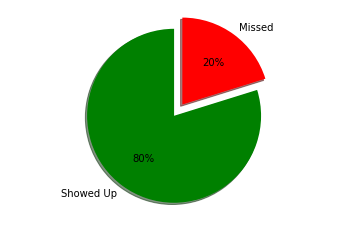

In [20]:
# visualizing the result
data = [s_percent, m_percent]
label = ['Showed Up', 'Missed']
plt.axis('equal')
plt.pie(data, labels = label, colors = ['green','red'], explode = (0.01, 0.15), autopct = '%1.f%%', shadow = True, startangle = 90);

### Question 2 - What is the average age of patients with Diabetes?

In this section I would be checking for the average age of patients that have diabetes

Firstly, I would be checking for the average age of all the patients.

In [21]:
# checking for the average age of all patients in this datset
df.age.mean()

37.08887421173107

The next thing I would do is group the age by diabetes status and check for the average

In [22]:
df.groupby('diabetes').age.mean()

diabetes
0    35.208610
1    61.372529
Name: age, dtype: float64

Visualizing my findings on a chart

In [23]:
# plotting the average on a chart
d_average = df.groupby('diabetes').age.mean()

In [39]:
def label(x, y, t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)

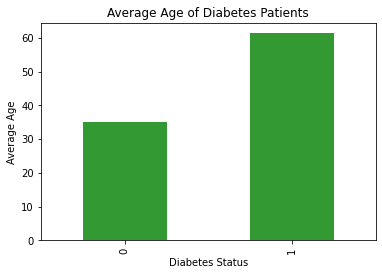

In [40]:
# plotting the average on a chart
d_average.plot(kind = 'bar', color = 'g', alpha = .8)
label('Diabetes Status', 'Average Age', 'Average Age of Diabetes Patients');

I can drill further into this analysis by checking the average age of diabetes patients who showed up for their appointment.

In [25]:
df.groupby(['no_show', 'diabetes']).age.mean()

no_show  diabetes
No       0           35.887092
         1           61.659757
Yes      0           32.555125
         1           60.064336
Name: age, dtype: float64

I can visualize my findings on a chart

In [26]:
avg_grouped = df.groupby(['no_show', 'diabetes']).age.mean()
missed_avg = avg_grouped['Yes']
showedup_avg = avg_grouped['No']

In [ ]:
ind = np.arange(len(missed_avg))  # the x locations for the groups
width = 0.15       # the width of the bars

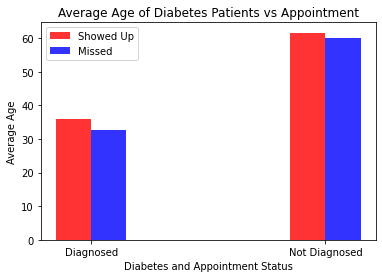

In [28]:
showedup_bar = plt.bar(ind, showedup_avg, width, color = 'r', alpha = .8, label ='Showed Up')
missed_bar = plt.bar(ind + width, missed_avg, width, color = 'b', alpha = .8, label ='Missed')

label('Diabetes and Appointment Status','Average Age','Average Age of Diabetes Patients vs Appointment')
locations = ind + width / 2  # xtick locations
labels = ['Diagnosed', 'Not Diagnosed']  # xtick labels
plt.xticks(locations, labels)
plt.legend();

The average age of all the patients in this dataset is **37.08887421173107**. 
<br> 
I would assume that "0" in the diabetes column stands for "No" while "1" stands for "Yes".<br> And as for the No_show. "No" means The patient showed up for the appointment while "Yes" means the patient did not show up for the appointment. 
<br> 
With that in mind the average age of patients not diagnosed with diabetes is **35.208610** while the average age of people diagnosed with diabetes is **61.372529**.
<br>
<br>
Also with further drilldown, I was able to find out that the average age of people that were not diagnosed and showed up for the appointment is **35.887092** while those that were not diagnosed but did not show up for the is **61.659757**. 
<br>The average age of people that were diagnosed and showed up for the appointment is **32.555125** while those that were diagnosed but did not show up for the appointment is **60.064336**
<br>

With the analysis and visualization above we're able to tell that patients who have been diagnosed and show up more than the people who have not been diagnosed.

### Question 3 -  Which Gender has more cases of hypertension?

In [29]:
# checking the count for each gender 
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

There are **71,840 females** and **38,687 males** in this dataset which means that majority of the patients are females. With that being noted I will proceed to visualize this on a pie-chart

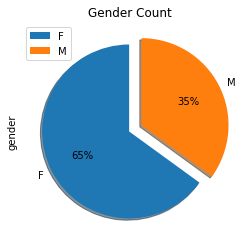

In [30]:
df['gender'].value_counts().plot(kind = 'pie', figsize =(4,4), title ='Gender Count', explode = (0.01, 0.15), autopct = '%1.f%%', shadow = True, startangle = 90)
plt.legend();

With the visualization above we are able to confirm that the Females are the majority making up **65%** of the total patients

For the next step I would be grouping the gender by hypertension status

In [31]:
df.groupby('gender').hypertension.value_counts()

gender  hypertension
F       0               56501
        1               15339
M       0               32225
        1                6462
Name: hypertension, dtype: int64

From the resuls above, it is noted that the females with hypertension are more than the males with females having .<br> However the result might be biased because the majority of the patients are females.<br> With that being said, I'd go ahead to visualize results for better view and understanding.

In [32]:
gender_grouped = df.groupby('gender').hypertension.value_counts()
Female = gender_grouped['F']
Male = gender_grouped['M']

In [33]:
ind = np.arange(len(Female))  # the x locations for the groups
width = 0.25       # the width of the bars

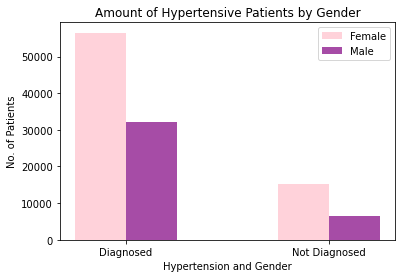

In [38]:
female_bar = plt.bar(ind, Female, width, color = 'pink', alpha = .7, label ='Female')
male_bar = plt.bar(ind + width, Male, width, color = 'purple', alpha = .7, label ='Male')

label('Hypertension and Gender','No. of Patients','Amount of Hypertensive Patients by Gender')
locations = ind + width / 2  # xtick locations
labels = ['Diagnosed', 'Not Diagnosed']  # xtick labels
plt.xticks(locations, labels)
plt.legend();

### Question 4 -  Which Neighbourhood has the Most and Least Patients?

In this section, I would be checking which Neighbourhood has the most number of unique patients. <br>
But before I do this, I would need to count the number of unique patients in the dataset.

In [35]:
# checking for the number of unique patients in the dataset
df['patientid'].nunique()

62299

Since I've found ot that there are **62,299 unique patients** in this dataset, I would group them by the neighbourhood column.

In [36]:
# grouping and arranging the the values
df.groupby('neighbourhood').patientid.nunique().sort_values(ascending = False)

neighbourhood
JARDIM CAMBURI                 4192
MARIA ORTIZ                    3336
JARDIM DA PENHA                2406
RESISTÊNCIA                    2373
ITARARÉ                        2136
                               ... 
ILHA DO BOI                      22
AEROPORTO                         7
ILHA DO FRADE                     5
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: patientid, Length: 81, dtype: int64

Now that I have grouped the patients by the Neighbourhoods in this dataset, I was able to tell that **JARDIM CAMBURI** with **4192 patients** has the highest number of patients while **PARQUE INDUSTRIAL** with **1 patient** has the least number of patient.<br>
To make this easier to view, I would be showing my results with the aid of graphs.

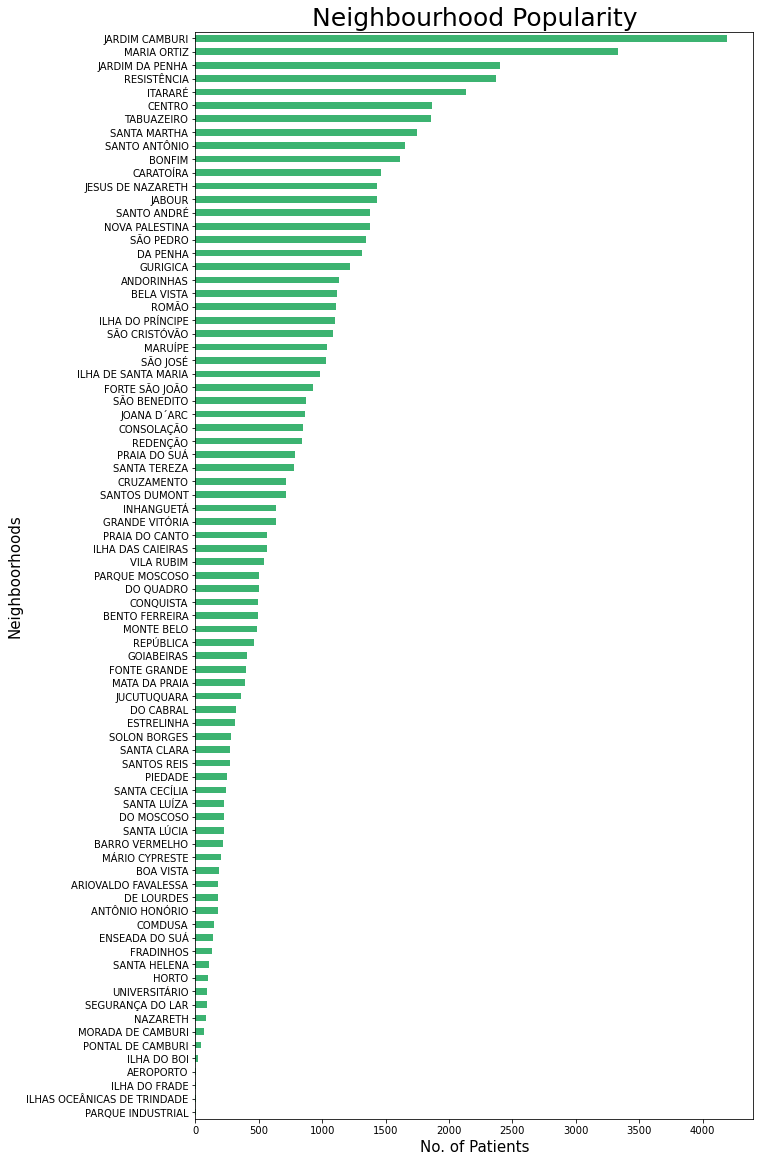

In [37]:
# visualizing my results
df.groupby('neighbourhood').patientid.nunique().sort_values(ascending = False).plot.barh(figsize = (10,20), color = 'mediumseagreen').invert_yaxis()
plt.title('Neighbourhood Popularity', fontsize = 25)
plt.ylabel('Neighboorhoods', fontsize = 15)
plt.xlabel('No. of Patients', fontsize = 15);

<a id='conclusions'></a>
## Conclusions

From my analysis, I discovered that about 20% of all the patients missed their appointments. I was also able to find out that are more females that have been diagnosed with diabetes compared to male patients in this dataset. Though the result might be biased because majority of the patient in this dataset are females.<br>

The average age of all the patients in this dataset is approximately 37 years.

With that in mind the average age of patients not diagnosed with diabetes is approximately 35 years while the average age of people diagnosed with diabetes is 61 years.<br>

Its also worth noting that more women have been diagnosed with hypertension.<br>

To finalize my analysis, I decided to check the neighbourhood with the most and least patients and I found out that JARDIM CAMBURI with 4192 patients has the highest number of patients while PARQUE INDUSTRIAL with 1 patient has the least number of patient.

#### Limitations
The limitation I faced during my analysis is that the no_show column contained "Yes" and "No" which made it quite confusing to understand so i just assumed that "Yes" means the patient did not show up for the appointment while "No" means the patient showed up for the appointment. Also the "Hypertension" and "Diabetes" columns coontain "0" and "1" so I just assumed "0" means "No" while "1" means "Yes".